# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [26]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [27]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [28]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"] 
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [29]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [30]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"] 
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [31]:
#  4. Get the average fare per ride for each city type. 
#average_fare_by_ride_urban = total_fares(urban)/total_rides
#average_fare_by_ride_urban

#urban_cities_df.groupby(["city"]).mean()["fare"]

average_fare_ride = pyber_data_df.groupby(["type"]).sum()["fare"]/ total_rides
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [32]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = pyber_data_df.groupby(["type"]).sum()["fare"]/total_drivers
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [33]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame ({
            "Total Rides": total_rides,
            "Total Drivers": total_drivers,
            "Total Fares": total_fares,
            "Average Fare per Ride": average_fare_ride,
            "Average Fare per Driver": average_fare_driver})
pyber_summary_df
    

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [34]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [35]:
pyber_summary_df.dtypes


Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [36]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].astype(float)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].astype(float)

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125.0,78.0,"$4,327.93",$34.62,$55.49
Suburban,625.0,490.0,"$19,356.33",$30.97,$39.50
Urban,"1,625.0","2,405.0","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [37]:
# 1. Read the merged DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908451377344,46,Urban
5,South Latoya,3/11/19 12:26,9.52,1994999424437,10,Urban
6,New Paulville,2/27/19 11:17,43.25,793208410091,44,Urban
7,Simpsonburgh,4/26/19 0:43,35.98,111953927754,21,Urban
8,South Karenland,1/8/19 3:28,35.09,7995623208694,4,Urban
9,North Jasmine,3/9/19 6:26,42.81,5327642267789,33,Urban


In [38]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_fares_df = pyber_data_df.groupby(["type", "date"]).sum("fare")
sum_fares_df            


fare        ride_id  driver_count
type  date                                             
Rural 1/1/19 9:45    43.69  2424875833354             1
      1/11/19 4:39   16.42  8800556719157             6
      1/14/19 15:58  54.10   432925983890             6
      1/14/19 7:09   18.05  5405362355006             1
      1/15/19 21:44  30.26  3837056996776             1
...                    ...            ...           ...
Urban 5/8/19 1:54    32.69  1643407853276            25
      5/8/19 2:31    41.33  5688921852912             4
      5/8/19 4:20    21.99   117997692054            52
      5/8/19 4:39    18.45  1811574736337            11
      5/8/19 7:29    18.55  5682021476085            33

[2364 rows x 3 columns]

In [39]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fares_df = sum_fares_df.reset_index()


In [40]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_pivot = sum_fares_df.pivot('date', 'type', 'fare')
sum_fares_pivot.head(25)

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
1/1/19 14:52,NaN,31.15,NaN
1/1/19 17:22,NaN,NaN,42.11
1/1/19 21:04,NaN,NaN,11.71
1/1/19 2:07,NaN,24.07,NaN


In [41]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
sum_fares_limited = sum_fares_pivot.loc[(sum_fares_pivot.index >= "1/1/2019") & (sum_fares_pivot.index <= "4/29/2019")]
sum_fares_limited.tail(10)

type,Rural,Suburban,Urban
date,,,
4/29/19 22:08,NaN,25.75,NaN
4/29/19 23:05,NaN,NaN,14.59
4/29/19 23:10,NaN,29.39,NaN
4/29/19 2:04,NaN,31.59,NaN
4/29/19 2:49,NaN,NaN,41.27
4/29/19 6:08,NaN,17.99,NaN
4/29/19 6:57,NaN,NaN,23.99
4/29/19 7:09,NaN,34.77,NaN
4/29/19 7:38,NaN,NaN,9.08


In [42]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
sum_fares_limited.index = pd.to_datetime(sum_fares_limited.index)

In [43]:
# 7. Check that the datatype for the index is datetime using df.info()
#sum_fares_limited.info()
sum_fares_limited.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2067 entries, 2019-01-10 00:17:00 to 2019-04-29 07:50:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     106 non-null    float64
 1   Suburban  540 non-null    float64
 2   Urban     1423 non-null   float64
dtypes: float64(3)
memory usage: 64.6 KB


In [44]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_fares_limited_week = sum_fares_limited.resample("W").sum()
sum_fares_limited_week.head(25)

type,Rural,Suburban,Urban
date,,,
2019-01-06,144.23,593.08,1533.90
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


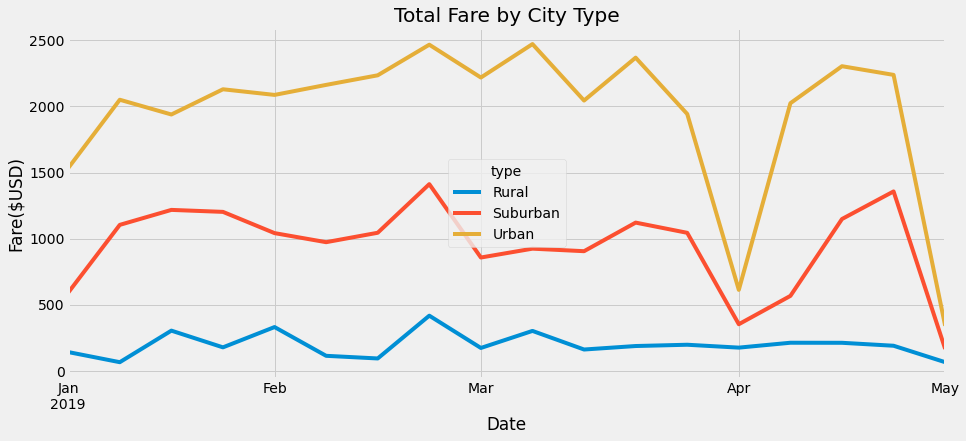

In [45]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
sum_fares_limited_week.plot(figsize = (14,6))

# Create the plot and add a label for the legend. MATLAB
#plt.plot(x_axis, y_axis, marker="*", color="blue", linewidth=2, label='Boston')
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Fare($USD)")
# Set the x limit.
#plt.xlim("Jan", "May")
# Create a title.
plt.title("Total Fare by City Type")
# Add the legend.
#plt.legend()
# Save the figure.
#plt.savefig("Analysis/Fig1.png")
plt.savefig("Analysis/PyBer_fare_summary.png")